In [2]:
import random

# Rzut kostką (liczby od 1 do 6)
roll = random.randint(1, 6)
print("Wynik rzutu kostką:", roll)


Wynik rzutu kostką: 5


In [3]:
# Symulacja 10 000 rzutów kostką
n = 10_000
results = [random.randint(1, 6) for _ in range(n)]

# Liczenie częstości każdej liczby
from collections import Counter
counts = Counter(results)

# Obliczanie prawdopodobieństw
probabilities = {outcome: count / n for outcome, count in counts.items()}
print("Prawdopodobieństwa empiryczne:", probabilities)


Prawdopodobieństwa empiryczne: {4: 0.1679, 3: 0.1723, 2: 0.1639, 5: 0.1655, 1: 0.1633, 6: 0.1671}


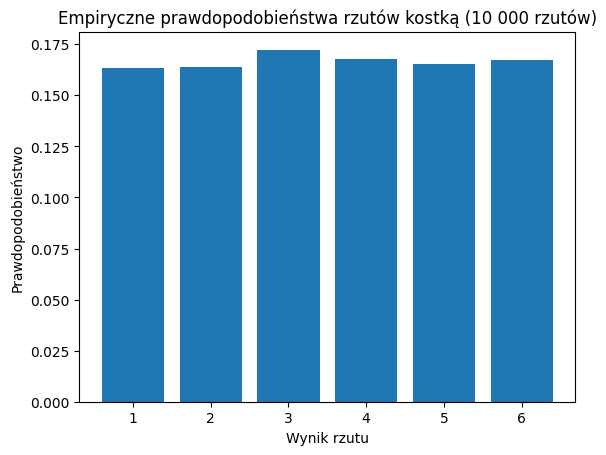

In [4]:
import matplotlib.pyplot as plt

# Wykres słupkowy
plt.bar(probabilities.keys(), probabilities.values())
plt.title("Empiryczne prawdopodobieństwa rzutów kostką (10 000 rzutów)")
plt.xlabel("Wynik rzutu")
plt.ylabel("Prawdopodobieństwo")
plt.show()


In [5]:
# Wszystkie możliwe rzuty, gdzie pierwszy rzut to 3
possible_second = [random.randint(1, 6) for _ in range(10_000)]
count_sum_7 = sum(1 for second in possible_second if 3 + second == 7)

# Prawdopodobieństwo warunkowe
prob = count_sum_7 / len(possible_second)
print("P(Pierwszy rzut = 3 | suma = 7):", prob)


P(Pierwszy rzut = 3 | suma = 7): 0.1666


In [6]:
import numpy as np

# 1 = orzeł, 0 = reszka
coin_flips = np.random.binomial(n=1, p=0.5, size=10000)
prob_heads = np.mean(coin_flips)
print("Szacowane P(orzeł):", prob_heads)


Szacowane P(orzeł): 0.5064


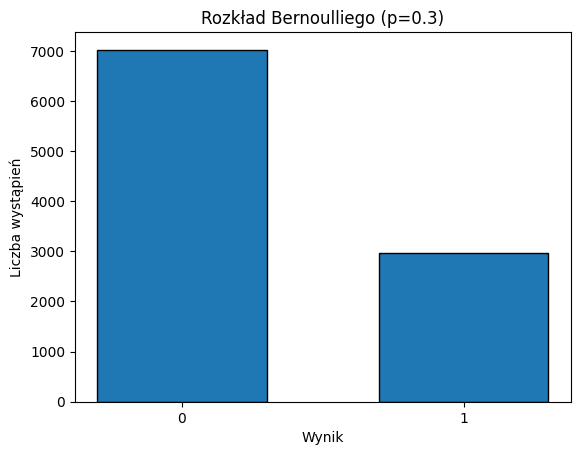

In [7]:
from scipy.stats import bernoulli


# Parametr p = 0.3
p = 0.3
data = bernoulli.rvs(p, size=10000)


plt.hist(data, bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.6)
plt.xticks([0, 1])
plt.title("Rozkład Bernoulliego (p=0.3)")
plt.xlabel("Wynik")
plt.ylabel("Liczba wystąpień")
plt.show()


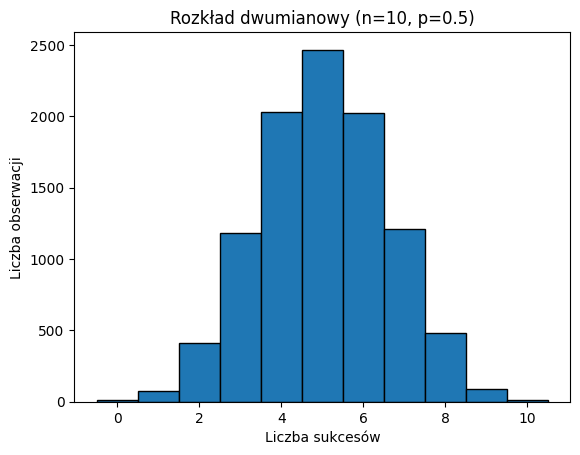

In [8]:
from scipy.stats import binom

# n = 10 rzutów, p = 0.5 (uczciwa moneta)
n, p = 10, 0.5
data = binom.rvs(n, p, size=10000)

# Wykres
plt.hist(data, bins=np.arange(n+2)-0.5, edgecolor='black')
plt.title("Rozkład dwumianowy (n=10, p=0.5)")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Liczba obserwacji")
plt.show()


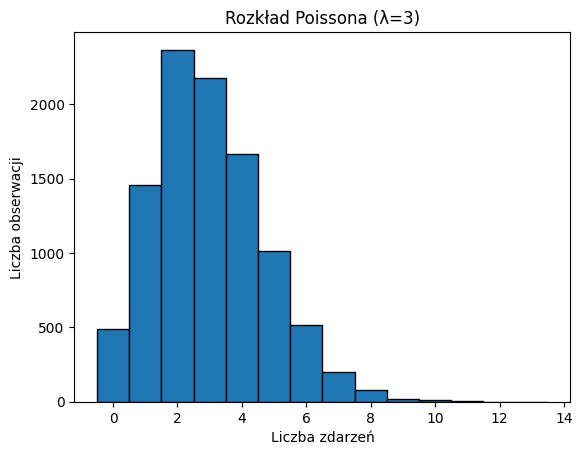

In [9]:
from scipy.stats import poisson

# lambda = 3 (średnio 3 zdarzenia na jednostkę czasu)
lam = 3
data = poisson.rvs(mu=lam, size=10000)

# Wykres
plt.hist(data, bins=np.arange(15)-0.5, edgecolor='black')
plt.title("Rozkład Poissona (λ=3)")
plt.xlabel("Liczba zdarzeń")
plt.ylabel("Liczba obserwacji")
plt.show()


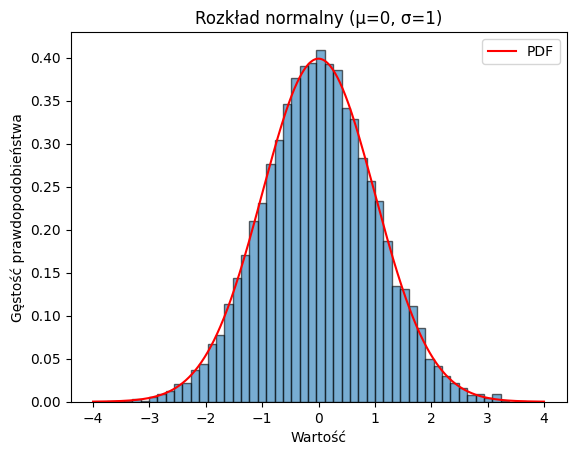

In [10]:
from scipy.stats import norm

# Średnia = 0, odchylenie standardowe = 1
mu, sigma = 0, 1
data = norm.rvs(loc=mu, scale=sigma, size=10000)

# Wykres
plt.hist(data, bins=50, density=True, edgecolor='black', alpha=0.6)

# Dodanie gęstości
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', label="PDF")
plt.title("Rozkład normalny (μ=0, σ=1)")
plt.xlabel("Wartość")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.show()


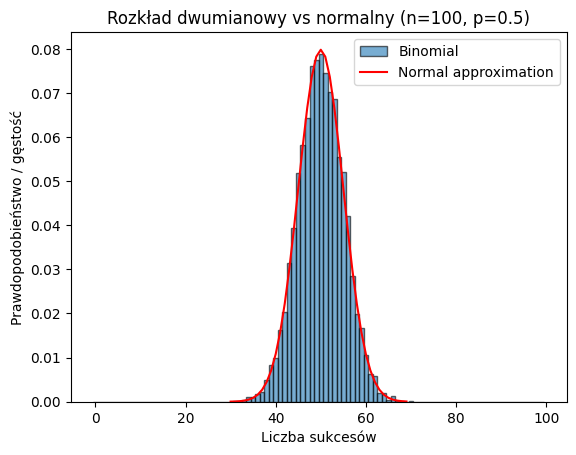

In [11]:

from scipy.stats import binom, norm

# Parametry
n = 100
p = 0.5
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Dane
binom_data = binom.rvs(n, p, size=10000)
x = np.arange(mu - 4*sigma, mu + 4*sigma)
normal_pdf = norm.pdf(x, mu, sigma)

# Histogram binomialny
plt.hist(binom_data, bins=np.arange(n+1)-0.5, density=True, alpha=0.6, label="Binomial", edgecolor='black')

# Wykres normalnej
plt.plot(x, normal_pdf, 'r-', label="Normal approximation")

# Opis
plt.title("Rozkład dwumianowy vs normalny (n=100, p=0.5)")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo / gęstość")
plt.legend()
plt.show()


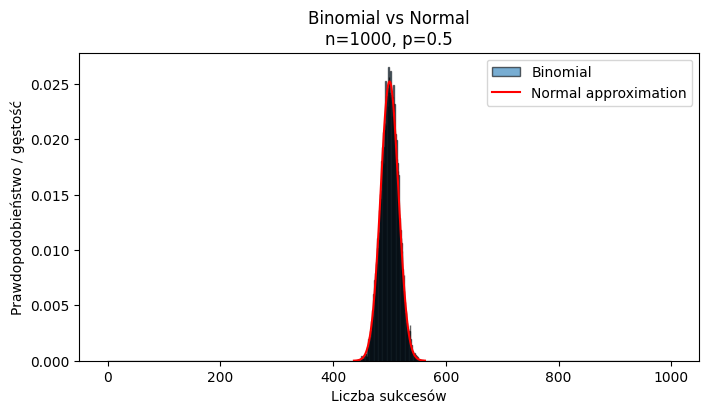

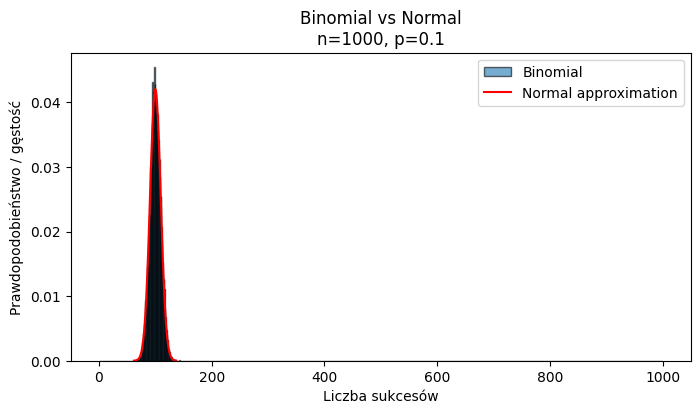

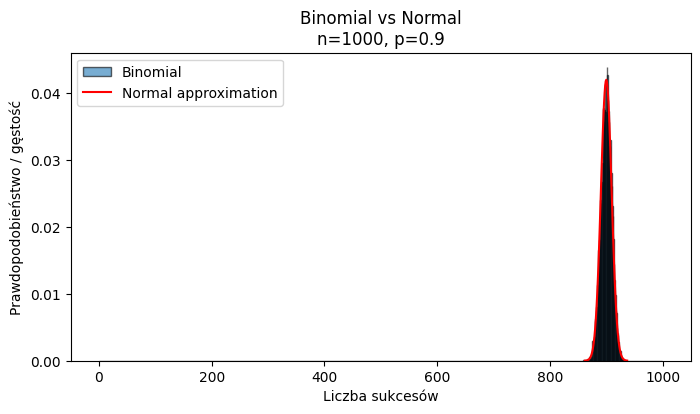

In [12]:


def plot_binomial_vs_normal(n, p):
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))
    
    # Dane
    binom_data = binom.rvs(n, p, size=10000)
    x = np.arange(mu - 4*sigma, mu + 4*sigma)
    normal_pdf = norm.pdf(x, mu, sigma)

    # Histogram + wykres
    plt.figure(figsize=(8, 4))
    plt.hist(binom_data, bins=np.arange(n+1)-0.5, density=True, alpha=0.6,
             edgecolor='black', label='Binomial')
    plt.plot(x, normal_pdf, 'r-', label='Normal approximation')
    plt.title(f'Binomial vs Normal\nn={n}, p={p}')
    plt.xlabel("Liczba sukcesów")
    plt.ylabel("Prawdopodobieństwo / gęstość")
    plt.legend()
    plt.show()

# Symetryczny przypadek
plot_binomial_vs_normal(n=1000, p=0.5)

# Skrajnie lewostronny
plot_binomial_vs_normal(n=1000, p=0.1)

# Skrajnie prawostronny
plot_binomial_vs_normal(n=1000, p=0.9)
